# Find failed patches and rerun

Following the first run a number of coadds failed and subsequent photo-pipe stages. I think the majority of these were Memory errors for the coaddition. Some of the photopipe runs timed out.

In [69]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os
#We are using a rings skymap
from lsst.geom import SpherePoint 
from lsst.geom import degrees
from lsst.skymap.ringsSkyMap import RingsSkyMap, RingsSkyMapConfig

config = RingsSkyMapConfig()
#These config options are chose to be the same as HSC:
#https://github.com/lsst/obs_subaru/blob/master/config/hsc/makeSkyMap.py
#and copied for obs_vista
#https://github.com/lsst-uk/obs_vista/blob/master/config/makeSkyMap.py
config.numRings = 120
config.projection = "TAN"
config.tractOverlap = 1.0/60 # Overlap between tracts (degrees)
config.pixelScale = 0.168
sm = RingsSkyMap(config)
sxds_tracts = [8282,8283,8284,8523,8524,8525,8765,8766,8767] #manually got these from HSC DR2 pages

In [67]:
SUFFIX=time.strftime("%Y%m%d")
print(SUFFIX)

20201103


In [47]:
#USE HSC-Y which is the last task run in the pipeline
#forced = glob.glob('./data/rerun/coaddForcedPhot/deepCoadd-results/HSC-Y/*/*/*.fits)
f = open('complete_forced_VISTA-Ks_20201102.lis', "r")
forced = [l for l in f]
#coadds
f = open('coadds_VISTA-Ks_20201102.lis', "r")
coadds = [l for l in f]

In [63]:
coadds[-1]

'data/rerun/coadd/deepCoadd/VISTA-Ks/8767/8,3.fits\n'

In [49]:
len(coadds)

169

In [50]:
len(forced)

140

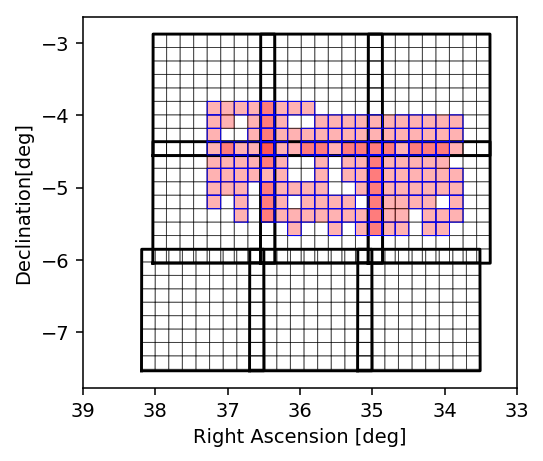

In [55]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=140)
        
for tract in sxds_tracts:
    vertices = sm.generateTract(tract).getVertexList()
    ra = [vertices[n][0].asDegrees() for n in np.mod(np.arange(5),4)]
    dec = [vertices[n][1].asDegrees() for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'k')
    for p in np.nditer(np.meshgrid(np.arange(0,9), np.arange(0,9))):
        #print(p[0], p[1])
        t = sm.generateTract(tract)
        vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
        ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
        #print(tract, ra)
        dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
        ax.plot(ra, dec, c = 'k', alpha=0.5, linewidth=0.5)

for file in coadds:
    patch = file.split('/')[6].split('.')[0]
    p = [int(i) for i in patch.split(',')]
    tract = int(file.split('/')[5])
    
    t = sm.generateTract(tract)
    vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
    ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
    #print(tract, ra)
    dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
    ax.fill(ra, dec, c = 'r', alpha=0.3, linewidth=0.5)


for file in forced:
    patch = file.split('/')[6]
    p = [int(i) for i in patch.split(',')]
    tract = int(file.split('/')[5])
    
    t = sm.generateTract(int(tract))
    vertices = t.getPatchInfo([p[0], p[1]]).getInnerSkyPolygon(t.getWcs()).getVertices()
    ra = [np.arctan(vertices[n][1]/vertices[n][0])* 180/np.pi for n in np.mod(np.arange(5),4)]
    #print(tract, ra)
    dec = [(vertices[n][2])* 180/np.pi for n in np.mod(np.arange(5),4)]
    ax.plot(ra, dec, c = 'b', alpha=1., linewidth=0.5)
        

    
ax.axis('scaled')
ax.set_xlim([39, 33])
ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination[deg]')
fig.savefig('./figs/sxds_failed_patches.pdf', overwrite=True)
fig.savefig('./figs/sxds_failed_patches.png', overwrite=True)

In [61]:
patches_in_video = json.loads(open('patches_in_video.json', 'r').read())

In [62]:
patches_in_video

{'8766': [[4, 0],
  [7, 2],
  [4, 2],
  [8, 2],
  [5, 1],
  [3, 2],
  [3, 3],
  [2, 1],
  [3, 0],
  [1, 1],
  [5, 2],
  [6, 0],
  [6, 2],
  [2, 0],
  [8, 0],
  [8, 1],
  [1, 2],
  [0, 3],
  [1, 0],
  [6, 1],
  [7, 0],
  [0, 1],
  [2, 3],
  [3, 1],
  [7, 1],
  [2, 2],
  [0, 0],
  [4, 1],
  [1, 3],
  [5, 0],
  [0, 2]],
 '8524': [[0, 8],
  [4, 3],
  [7, 4],
  [5, 4],
  [8, 8],
  [6, 8],
  [7, 8],
  [5, 6],
  [1, 2],
  [0, 3],
  [8, 4],
  [4, 8],
  [5, 3],
  [2, 3],
  [2, 2],
  [6, 3],
  [3, 5],
  [7, 7],
  [4, 2],
  [0, 5],
  [3, 2],
  [1, 7],
  [5, 2],
  [6, 6],
  [1, 8],
  [8, 3],
  [0, 6],
  [7, 3],
  [8, 5],
  [3, 6],
  [0, 2],
  [4, 5],
  [6, 5],
  [4, 6],
  [1, 4],
  [4, 4],
  [6, 7],
  [6, 4],
  [5, 8],
  [1, 6],
  [3, 7],
  [3, 8],
  [1, 3],
  [2, 6],
  [7, 2],
  [2, 5],
  [7, 5],
  [8, 2],
  [2, 4],
  [7, 6],
  [5, 5],
  [4, 7],
  [3, 3],
  [0, 4],
  [8, 7],
  [0, 7],
  [6, 2],
  [5, 7],
  [2, 7],
  [8, 6],
  [2, 8],
  [3, 4],
  [1, 5]],
 '8765': [[4, 0],
  [5, 1],
  [2, 1],
  [1

In [65]:
str([1,2])

'[1, 2]'

In [ ]:
passed_coadds = {}
for file in coadds:
    tract =
    patch = 
    try:
        passed_coadds[]

In [ ]:
failed_tiles = {}
for tract in patches_in_video:
    

In [70]:
os.mkdir( 'slurm_{}'.format(SUFFIX))